# Curve fitting 3
This curve fitting module looks at working with data that has more than one independant variable.  The scipy curve fitting will take a vector, or an array/matrix.

To get started, load up some libraries again...

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import math

Create some data of two variables, and then 
Create a function with two independent variables.  I'll give it some parameters so we can play with it in curve_fit.

In [2]:
# make two variables
x0 = [x/10 for x in range(100)]
x1 = [math.sin(x/10) for x in range(100)]
xa=(x0,x1)

In [3]:
def rf(X,fx0,fx1):
    x0,x1=X
    rv=np.sin(np.multiply(x0,fx0)+np.sin(np.multiply(x1,fx1)))
    return rv

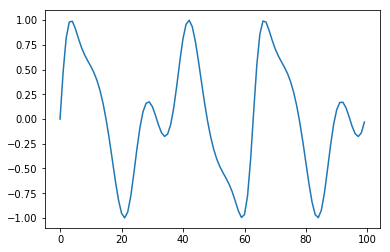

In [4]:
yv=rf((x0,x1),2,3)
plt.plot(yv)
plt.show()

That's a funny function. It is a function of two variables.To make things more interesting, the second variable is recurring. The result depends on both variables, not just one.

In [5]:
popt,pcov=opt.curve_fit(rf,xa,yv,(2,2)) # (2,2) is a starting hint
print(popt)
print(pcov)

[2. 3.]
[[1.05086372e-34 1.81132617e-34]
 [1.81132617e-34 1.07616607e-32]]


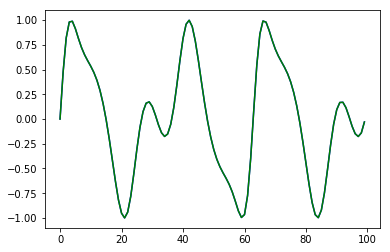

In [6]:
plt.plot(rf((x0,x1),2,3),'b')
plt.plot(rf((x0,x1),*popt),'g')
plt.show()

It worked and found the answer. It needed a hint of where to start hunting. Make a function, and explore the different hints, and what it ends up with...

In [7]:
def with_hint(h0,h1):
    popt,pcov=opt.curve_fit(rf,xa,yv,(h0,h1))
    print(popt)
    plt.plot(rf((x0,x1),2,3),'b')
    plt.plot(rf((x0,x1),*popt),'g')
    plt.show()

Now, test it out...

[2. 3.]


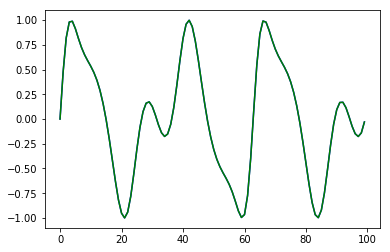

In [8]:
with_hint(2,3)

That worked pretty well.  It got the end result as a starting hint.

[-0.00712204 -0.02761779]


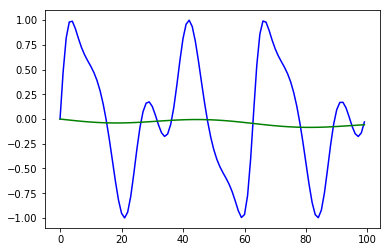

In [9]:
with_hint(0,0)

That didn't work very well. There must be a local minimum near this area...

[100.35835069  97.78645644]


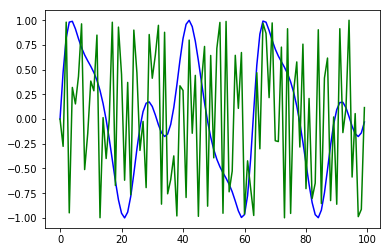

In [10]:
with_hint(100,100)

More of the same type of problem...
try closer to the actual parameters

[1.02618938 1.683846  ]


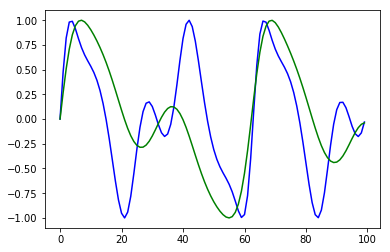

In [11]:
with_hint(1,2)

Not there yet...

[1.9966371  0.63831586]


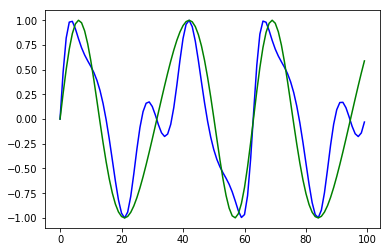

In [12]:
with_hint(2,1)

Didn't work... Another local minimum

[2. 3.]


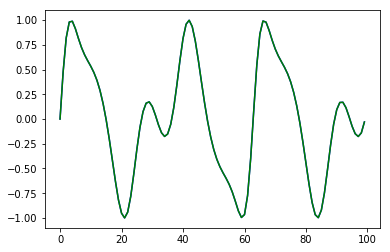

In [13]:
with_hint(2.2,3.4)

Found the answer as the minimum.

Moral of this is multivariable with repeating variables have many local minimums in the error function.  You may not find the 'best' answer. It seems ironic, but this works best if you already know the answer before you start.